In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date')

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df.index = pd.DatetimeIndex(df.index)

In [5]:
df = df[df['value']<=df['value'].quantile(0.975)]
df = df[df['value']>=df['value'].quantile(0.025)]

In [11]:
# Q!
def line_plot():
    plt.figure(figsize=(20,6))
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    lineplot = plt.plot(df.index,
             df.value,
             c='r')
    
    return lineplot

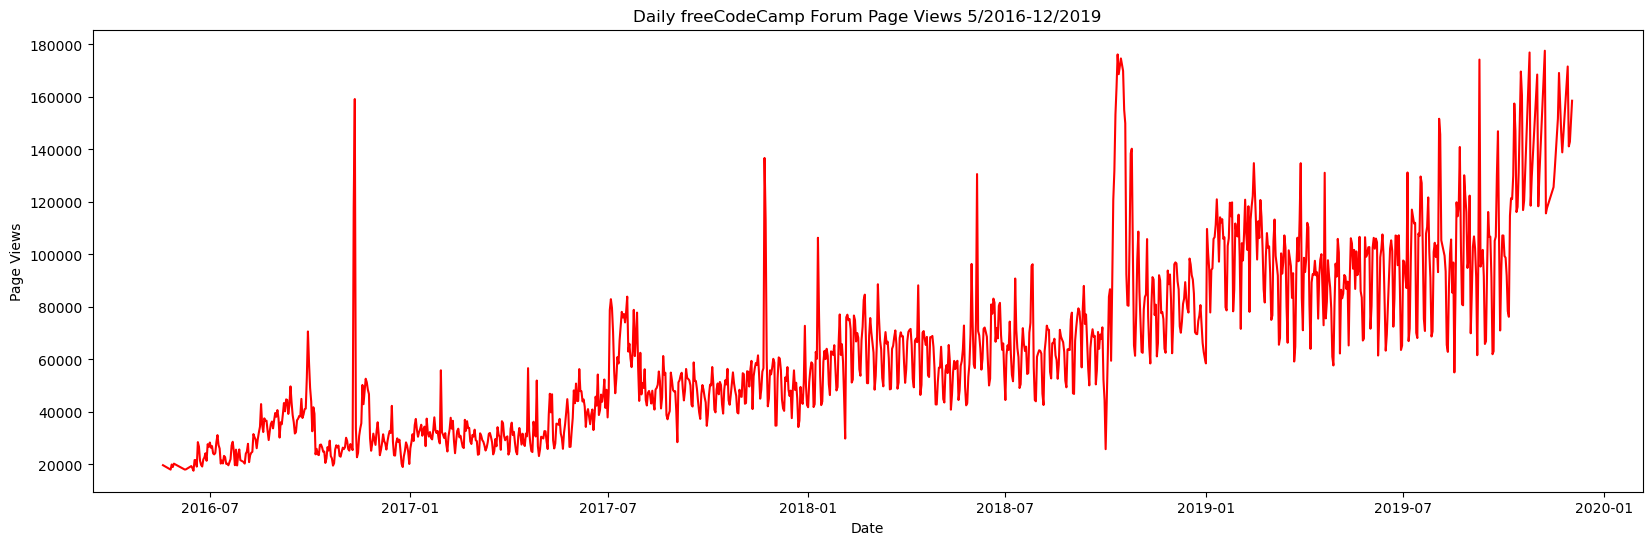

In [12]:
line_plot()

In [ ]:
# Q2
def bar_plot(data):
    data['ord'] = data.index.month
    data['day'] = data.index.day
    data['year'] = data.index.year
    data = data.sort_values('ord')
    data['month'] = data.index.month_name()
    df_bar = pd.DataFrame(data.groupby(['year','month','day','ord'])['value'].mean()).reset_index()
    df_bar = df_bar.sort_values('ord')
    plt.figure(figsize=(12,14))
    barplot = sns.barplot(x=df_bar['year'],
                y=df_bar['value'],
                hue=df_bar['month'],
                errorbar=None,
                palette='tab10')
    plt.ylabel('Average Page Views')
    plt.legend(loc='upper left',fontsize=17)
    return barplot
    

In [ ]:
bar_plot(df)

In [ ]:
# Q3

# def box_plot(data):
    

In [19]:
def box_plot(data):
    data['ord'] = data.index.month
    data['day'] = data.index.day
    data['year'] = data.index.year
    data = data.sort_values('ord')
    data['month'] = data.index.month_name()
    df_bar = pd.DataFrame(data.groupby(['year','month','day','ord'])['value'].mean()).reset_index()
    df_bar = df_bar.sort_values('ord')
    
    fig,axs = plt.subplots(1,2,figsize=(27,9))
    plt.subplot(1,2,1)
    sns.boxplot(df_bar,x='year',y='value',ax=axs[0])
    plt.ylabel('page value')
    plt.title("Year-wise Box Plot (Trend)")
    plt.subplot(1,2,2)
    sns.boxplot(df_bar,x='month',y='value',ax=axs[1])
    plt.ylabel('page value')
    plt.title("Month-wise Box Plot (Seasonality)")
    
    fig.savefig('box_plot.png')
    return fig


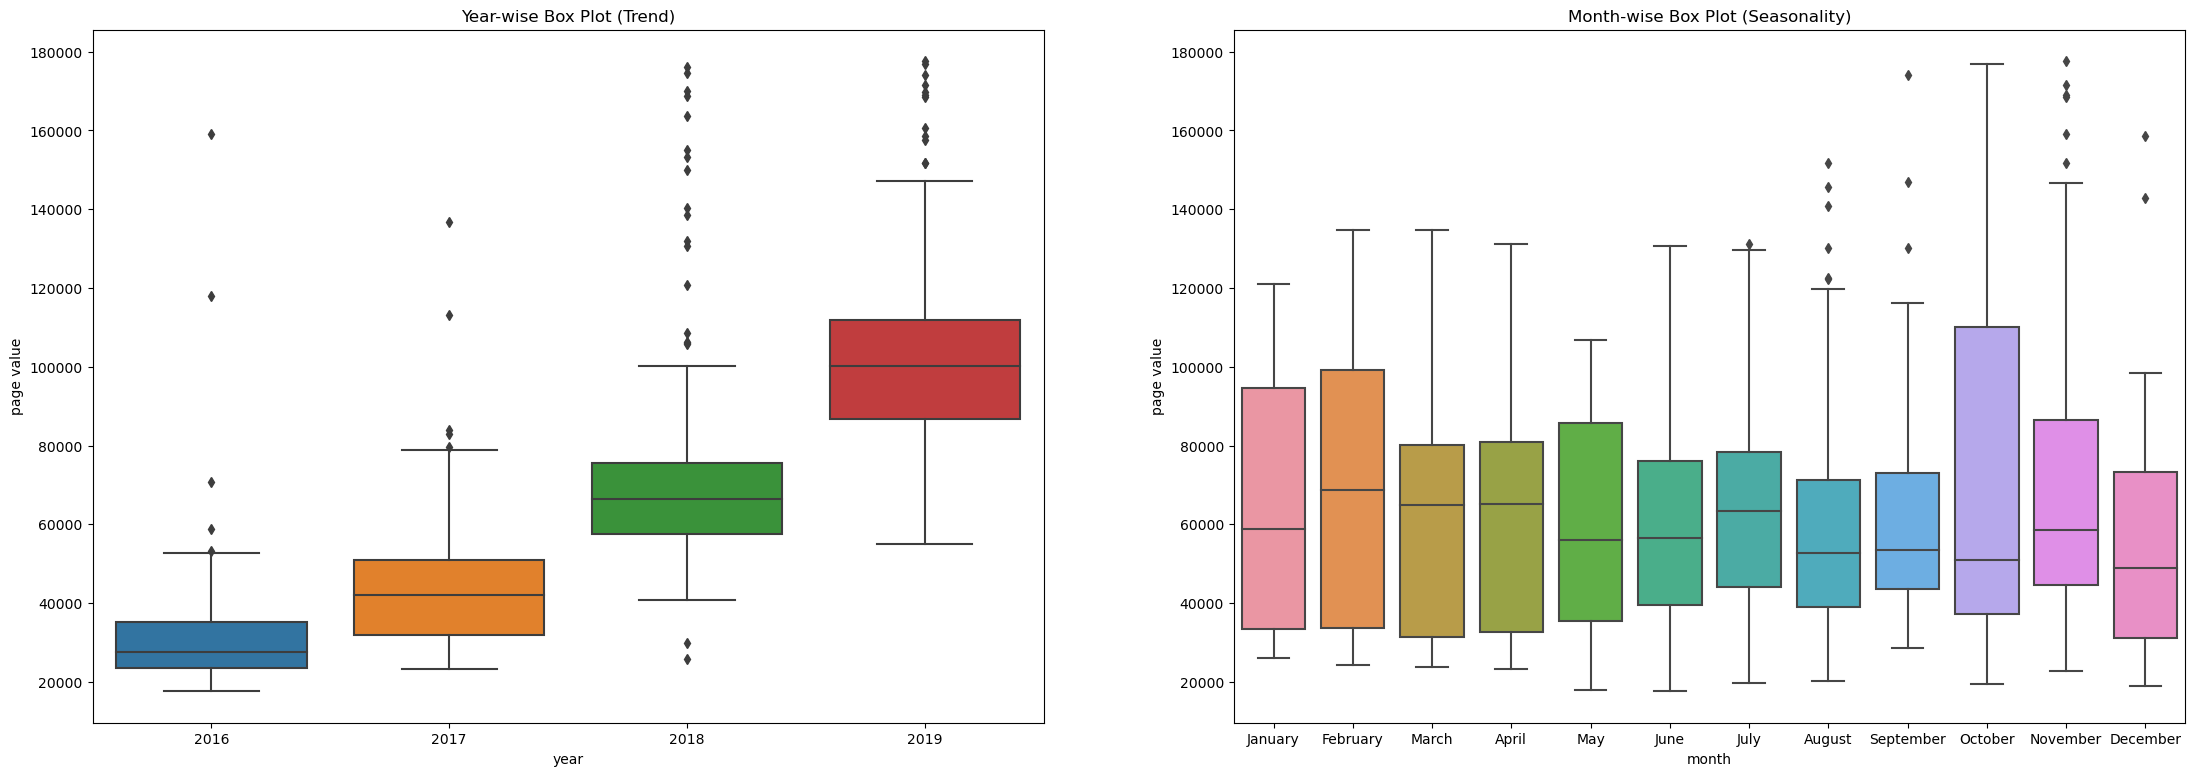

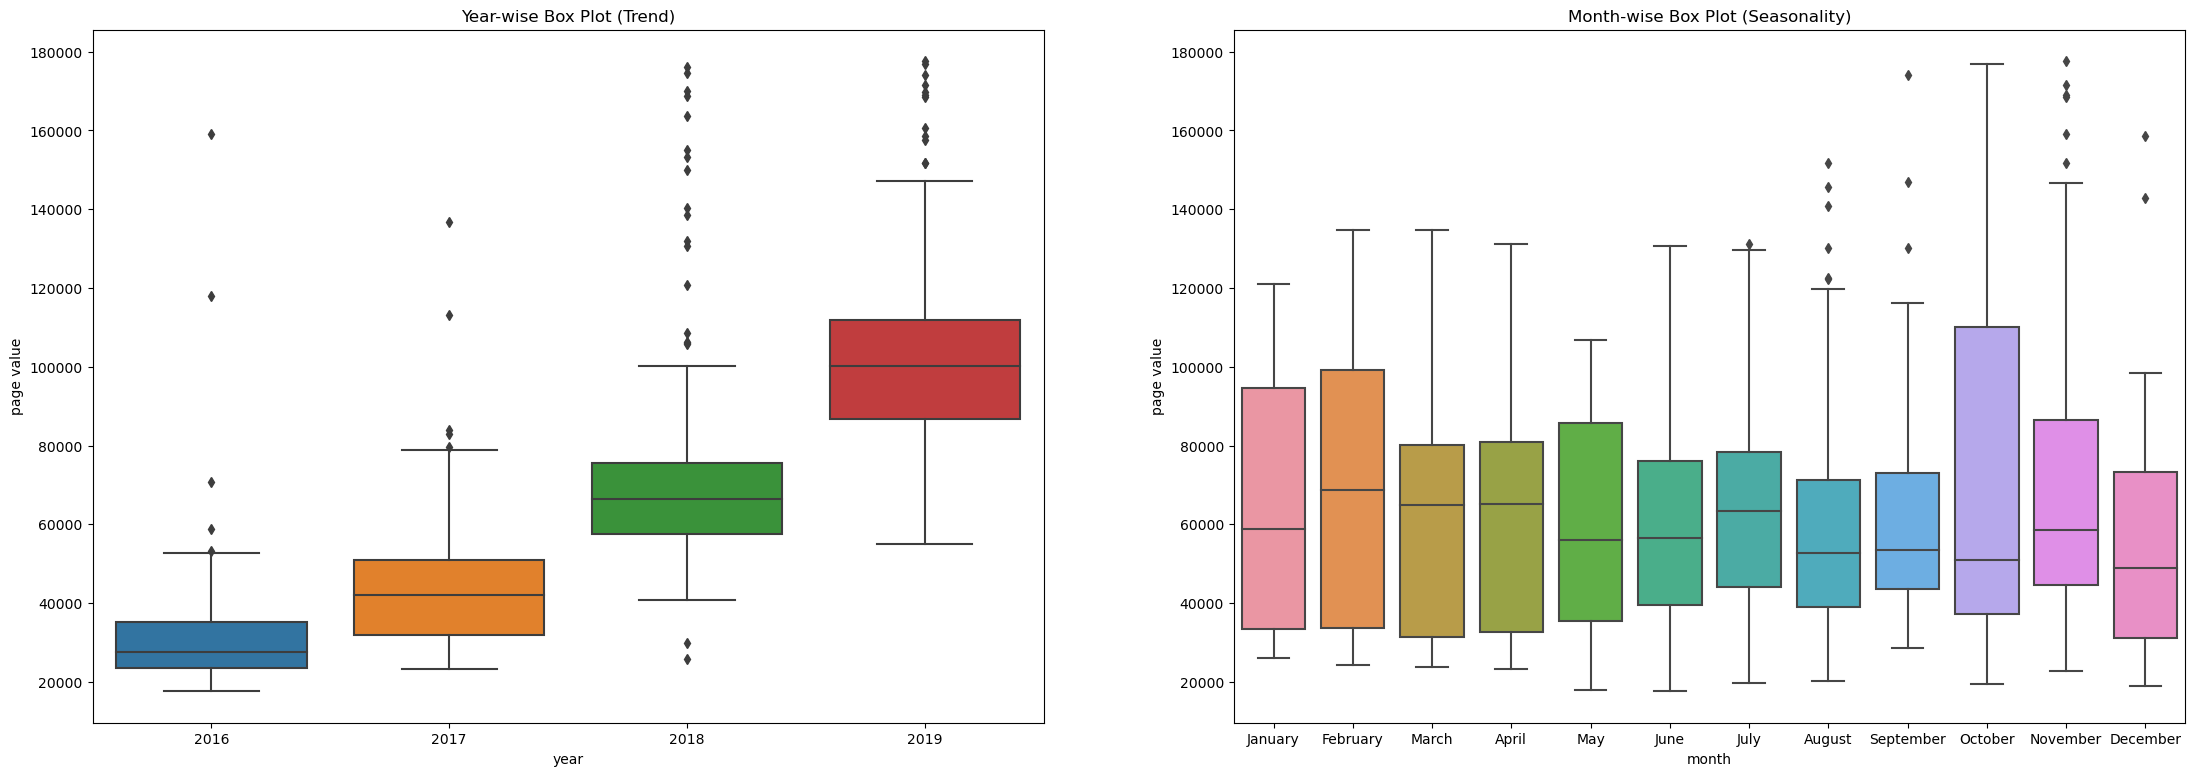

In [20]:
box_plot(df)